# Numerical Method for numerical evaluaiton of improper integral

### $\int_{a}^{b} f(x) dx = \int_{\frac{1}{b}}^{\frac{1}{a}} \frac{1}{t^2}f(\frac{1}{t}) dt $

#### Then evalutation with trapezoidal method $h\sum_{i=0}^{N-1} \frac{g(x_{i}) + g(x_{i+1})}{2}$ where $g(t) = \frac{1}{t^2}f(\frac{1}{t})$

In [266]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrale

In [516]:
tj = 1.5
a,b,c = np.random.randn(1),np.random.randn(1), np.random.randn(1)
b = -1*np.exp(b)
b

array([-2.10879948])

####  $t_{j+1} = \int_{t_{j}}^{\infty} t .f^{*}(t) dt $ where $f^{*}(t) = \exp(at+b +c\exp(dt+e)-c\exp(at+b))$ a,b,c,d and e are randomly selected 

In [268]:
def f(t,tj):
    return (t<=tj)*0 + (t>tj)*np.exp(a + b*(t-tj) + c*np.exp(a) - c * np.exp(a + b*(t-tj)))

def g(t,tj):
    return 1/(t**2) * f(1/t,tj)


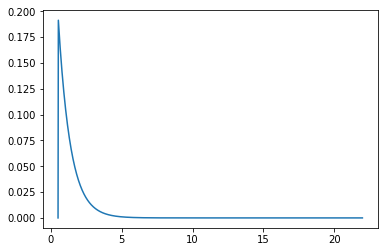

In [269]:
t = np.linspace(tj,22,1000)
y = f(t,tj)
plt.plot(t,y)

In [265]:
def f_(t):
    return f(t,tj)
integrale.quad(f_,0,np.infty)

(0.3207616335924402, 3.365439704694495e-09)

In [525]:
def Integration_trapez(function,a,b,N=10000):
    DeltaT = (b-a)/N  
    n = np.size(DeltaT)
    DeltaT = DeltaT.reshape((n,1))
    dt = DeltaT.repeat(N,axis=1)
    c_ = np.array([a]*n).reshape((n,1))
    dt = np.concatenate((c_,dt),axis=1)
    
    discrete_time = np.cumsum(dt,axis=1)
    discrete_f = function(discrete_time)
    
    sum_ = DeltaT * np.sum((discrete_f[:,1:] + discrete_f[:,:-1])/2,axis=1).reshape((n,1)) #trapezoidal rule
    sum_ = sum_.reshape(n)
    
    return sum_
    

In [526]:

m = np.array([1,2])
c = np.array([2,3])

m = m.reshape((2,1))
print(np.shape(m))
m = m.reshape(2)
print((np.shape(m)))

(2, 1)
(2,)


### f* is thus not a distribution function because its integration is not equal to 1

 #### $f^{*}(t,t_{j}) = \lambda^{*}(t)\exp(-\int_{t_{j}}^{t} \lambda^{*}(\tau) d\tau) $ with $\lambda^{*}(t) = \exp(a(t-t_{j})+b)$ and $ a < 0$

In [527]:
a = np.random.randn(1)
b = np.random.randn(1)
a = -1*np.exp(a)

In [528]:
def lambda_(t): 
    return np.exp(a*(t-tj) + b)

Text(0, 0.5, 'intensity profile for t greater than tj')

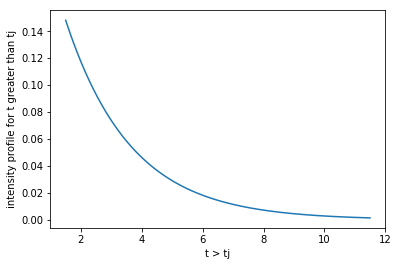

In [529]:
t =np.linspace(tj, tj+ 10, 1000)
l = lambda_(t)
plt.plot(t,l)
plt.xlabel("t > tj")

plt.ylabel("intensity profile for t greater than tj")

In [530]:
def f__(t,tj):
    value = Integration_trapez(lambda_,tj,t)
    #print(value)
    return (t>=tj)*lambda_(t)*np.exp(-1*value) + (t<tj)*0

0.27262545195364274


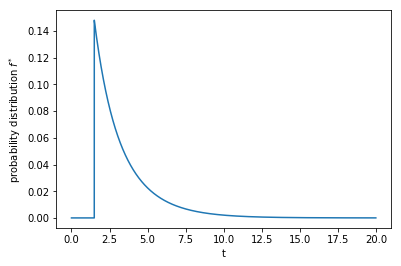

In [531]:
t =np.linspace(0,20, 10000)
y = f__(t,tj)
plt.plot(t,y)
plt.xlabel("t")
plt.ylabel("probability distribution $f^{*}$")
print(t[1]*np.sum(y))
